# Global Groundwater Conservation Scenarios 
**by: Iman Haqiqi, Department of Agricultural Economics, Purdue University**

First version: October 4, 2024

How to cite: 

Haqiqi, I. (2024). Global Groundwater Conservation Scenarios. I-GUIDE Platform Notebooks. (DD-MM-YYYY). https://platform.i-guide.io/notebooks

Haqiqi, I., Perry, C. J., & Hertel, T. W. (2022). When the virtual water runs out: local and global responses to addressing unsustainable groundwater consumption. Water International, 47(7), 1060-1084. https://doi.org/10.1080/02508060.2023.2131272



### Acknowledgement
This study was supported by:

DOE PCHES: The U.S. Department of Energy, Office of Science, Biological and Environmental Research Program, Earth and Environmental Systems Modeling, MultiSector Dynamics under Cooperative Agreement DE-SC0022141.

NSF I-GUIDE: The National Science Foundation, Institute for Geospatial Understanding through an Integrative Discovery Environment under award No. HDR-2118329.

NSF AccelNet: The National Science Foundation, GLASSNET: OISE-2020635. 


## Abstract
What are the impacts of groundwater sustainability restrictions on, local agriculture, regional trade, and global food system. This script visualizes the results of a global groundwater sustainability scenario focusing on water withdrawal, land use, and crop production.


## Method: A SIMPLE Economic Model to Capture Complex Nonlinearities

We use SIMPLE-G model. It is a Simplified International Model of agricultural Prices, Land use, and the Environment- gridded version. The SIMPLE-G model is a tool for analyzing the complex interaction between global food demand and local water stress, particularly within the agricultural sector.  It includes:

### 1. Global Food Consumption Module:

This module captures the relationship between food consumption as a function of price and income.  As prices fluctuate, consumer behavior adjusts.  Furthermore, the module incorporates the influence of income levels on dietary choices.  Rising incomes often lead to a shift towards more resource-intensive food options like meat, impacting the overall demand for agricultural products.

### 2. International Trade Module:

SIMPLE-G incorporates the concept of "imperfect substitution of domestic and imported crops." 

### 3. Gridded Production Module:

This module employs a production function that expresses crop yields as a function of several crucial inputs: land, water, fertilizer, labor, and other relevant factors.  Importantly, the model allows for grid-specific decision-making regarding land and water use.  These decisions are informed by parameters unique to each grid cell, sconsidering soil quality, water endowment, and climatic conditions.  

### Geospatial resolution 

SIMPLE-G Database version
- The grid cells are 5 arc-min (10km nonminal resolution) more than 2 million grid cells world-wide.
- The reference year is 2017.



<div>
  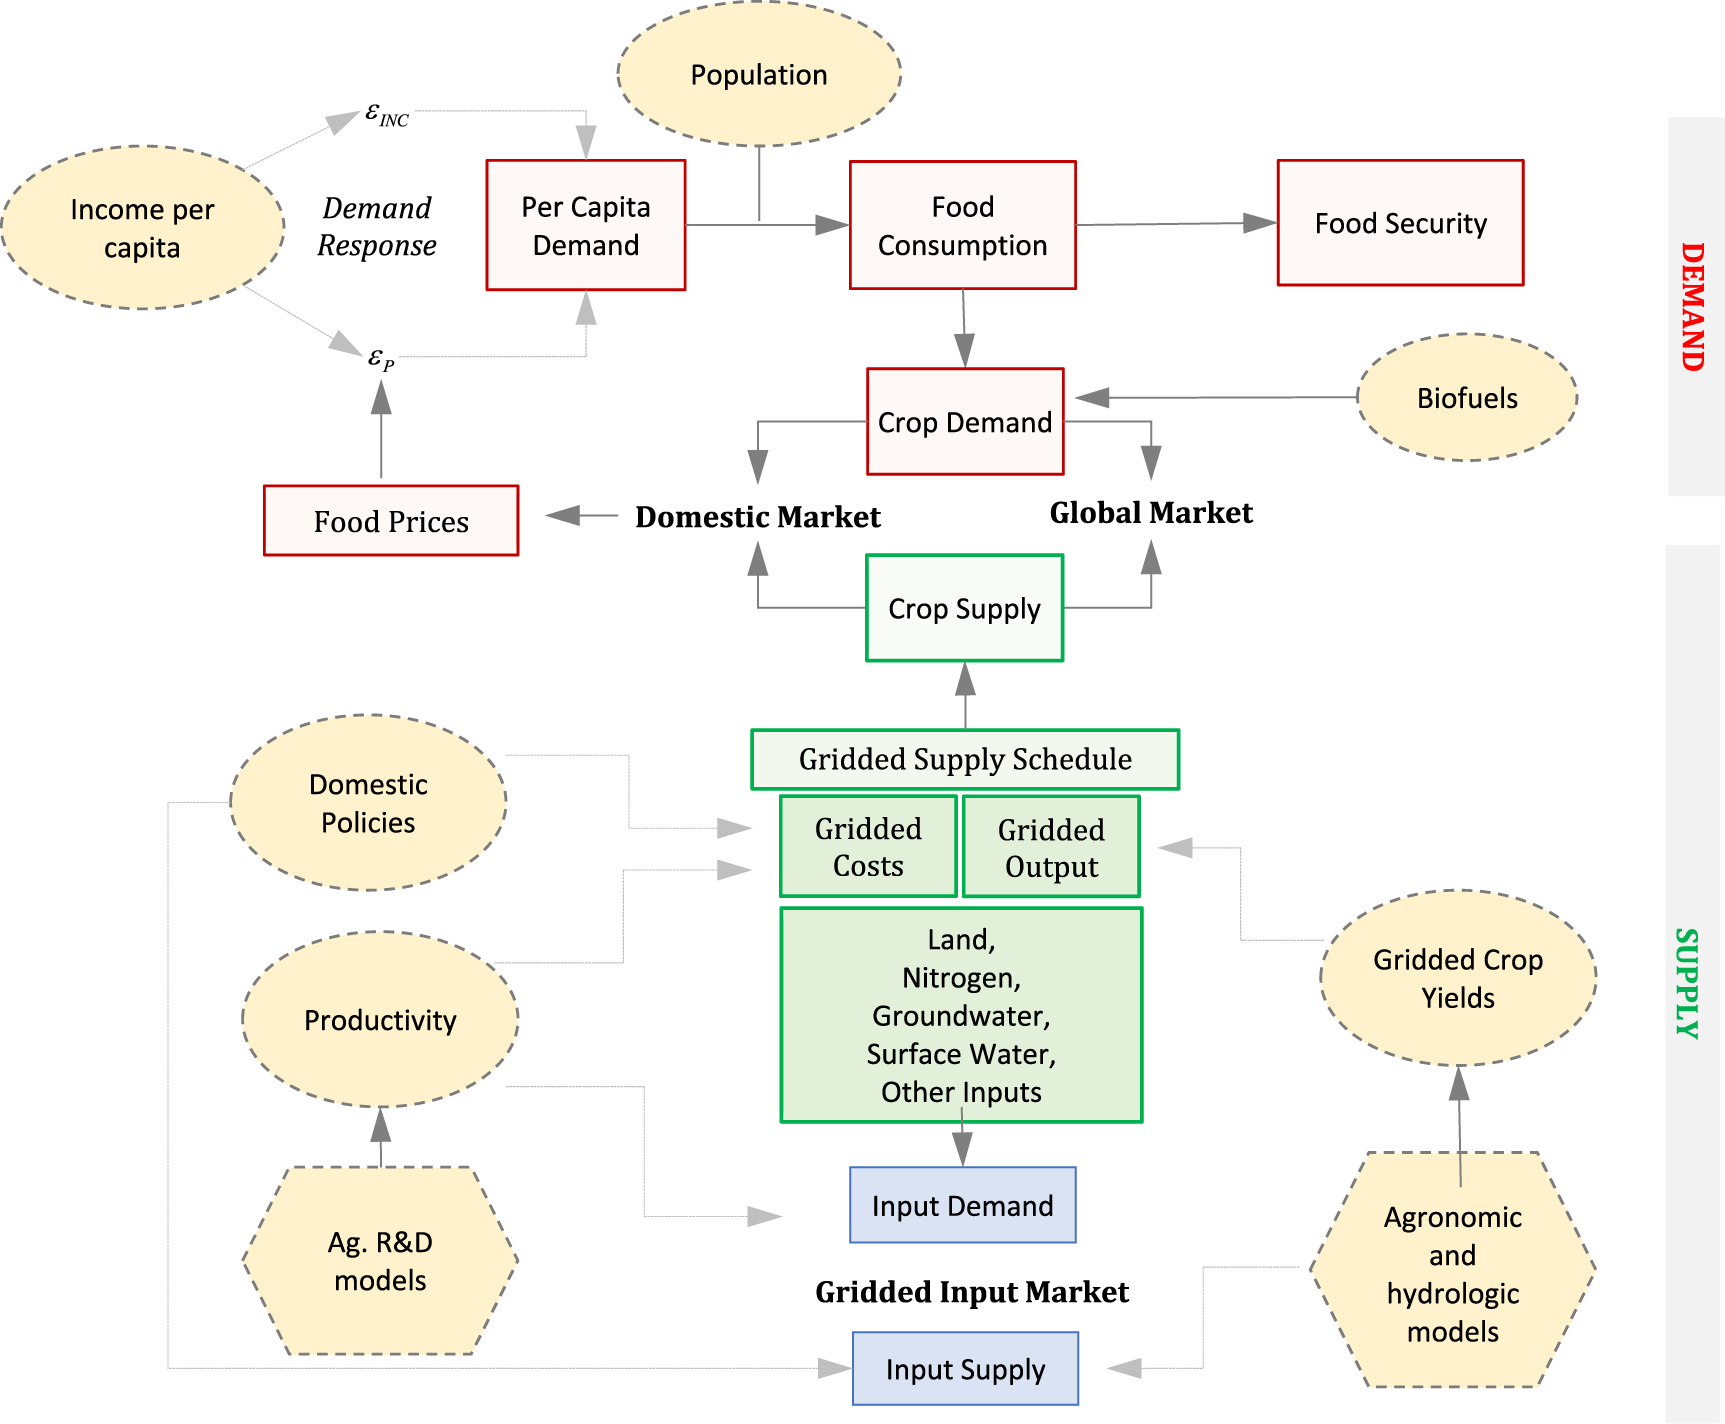
</div>

SIMPLE-G nested structure here

### Scenarios 
Groundwater sustainability scenario is defined as groundwater restriction to sustainable groundwater levels. The estimation of unsustainable groundwater withdrawal is based on WBM:

Grogan, D. S., Wisser, D., Prusevich, A., Lammers, R. B., & Frolking, S. (2017). The use and re-use of unsustainable groundwater for irrigation: a global budget. Environmental Research Letters, 12(3), 034017.

- Groundwater conservation policy: geospatial
- Surface water conservation policy: no new policy
- Land conservation policy: no new policy
- Water quality policy: no new policy


### File formats
SIMPLE-G is solved in GEMPACK. The native output files are HAR and SL4. For this exercise some txt outputs are generated.

- SL4
- HAR
- TXT

### Geospatial Variables

- Irrigation groundwater withdrawal 
- Irrigation surface water withdrawal
- Cropland area 
- Crop production
- Nitrogen Application
- Farmworket Employment Index

### Temporal dimension
The reference year is 2017. This is a comparative static analysis comparing two equilibrium states of the agricultural econmic system.



In [12]:
library(plotly)
library(crosstalk)




ERROR: Error in library(plotly): there is no package called ‘plotly’


In [7]:
# Install the zip package if not already installed
if (!require(zip)) {
  install.packages("zip")
  library(zip)
}

# Define the URL of the zip file
url <- "https://mygeohub.org/resources/1717/download/simpleg_water_sc01.zip"

# Define the destination folder and file paths
dest_folder <- "in"
dest_file <- file.path(dest_folder, "simpleg_water.zip")

# Create the destination folder if it doesn't exist
if (!dir.exists(dest_folder)) {
  dir.create(dest_folder)
}

# Download the zip file
download.file(url, dest_file, mode = "wb")

# Unzip the file
zip::unzip(dest_file, exdir = dest_folder)

# Print a message indicating completion
cat("Download and extraction complete.\n")

Loading required package: zip

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘zip’”
Warning message in install.packages("zip"):
“'lib = "/apps/share64/debian10/anaconda/anaconda-7/envs/R/lib/R/library"' is not writable”


ERROR: Error in install.packages("zip"): unable to install packages


In [9]:
my.file <- "in/simpleg_water_pct_t.txt"

# read original output file
my.lines <- readLines(my.file)

# Use grep to filter lines starting with "I" or "S"
my.filter <- grep("^[HV]", my.lines, invert = F)

# Read the filtered lines
new.lines <- my.lines[my.filter]

# Save a temporary file
tmp.file <-  "tmp/simpleg.txt" 
writeLines(new.lines, tmp.file, sep="\n")

# read the US gridded data 
df = read.csv(tmp.file, header=T, sep=",")
colnames(df)[1] <- "GRID"

head(df)


,GRID,LON,LAT,QLAND,QNITRO,QWATGRD,QWATSRF,QCROP,QLABOR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,H0110277,29.125,70.875,0.01162854,0.02047945,0.01678168,0.01446649,0.01509153,0.01516707
2,H0111696,23.875,70.625,0.01170608,0.02011815,0.01655154,0.01437186,0.01471993,0.01477106
3,H0111699,24.625,70.625,0.01145893,0.01931628,0.01630109,0.01412005,0.01389522,0.01438288
4,H0111709,27.125,70.625,0.03113412,0.05229560,0.04509385,0.03881099,0.03804020,0.03943251
5,H0111710,27.375,70.625,0.01119206,0.01904694,0.01610278,0.01387854,0.01361820,0.01410471
6,H0111720,29.875,70.625,0.01133221,0.01940863,0.01636155,0.01408929,0.01399018,0.01453845


### Plot the results
Here we plot the data.

Note that the longiture and latitude are multipled by 120 for technical accuracy concerns.

Also we truncate the large percentage changes to 500%.


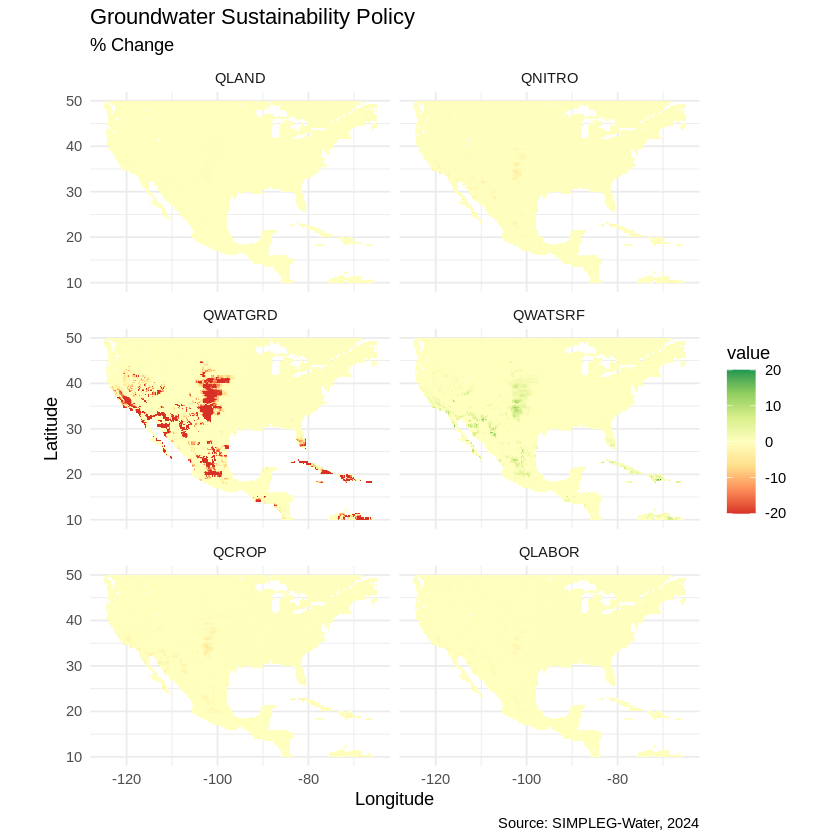

In [15]:
library(ggplot2)
library(reshape2)

xMin = -125
xMax = -65
yMin = 10
yMax = 50

df_selected = df[df$LON > xMin &
        df$LON < xMax & 
        df$LAT > yMin &
        df$LAT < yMax,]


df_melted <- melt(df_selected, id.vars = c("GRID", "LON", "LAT"), 
                  measure.vars = c("QLAND", "QNITRO", "QWATGRD", "QWATSRF", "QCROP", "QLABOR"),
                  variable.name = "variable", value.name = "value")

up.limit = +20
lo.limit = -20
df_truncated = df_melted
df_truncated$value[df_truncated$value > up.limit] = up.limit
df_truncated$value[df_truncated$value < lo.limit] = lo.limit

ggplot(df_truncated, aes(x=LON, y=LAT, fill=value)) +
  geom_tile()+
  facet_wrap(~ variable, ncol = 2) +
  scale_fill_distiller(palette = "RdYlGn", limits = c(lo.limit, up.limit), direction = 1) +
  coord_fixed(ratio = 1) +
  labs(x='Longitude',y='Latitude',
       title="Groundwater Sustainability Policy",
       subtitle='% Change',
       caption='Source: SIMPLEG-Water, 2024')+
  theme_minimal()   # Use a minimal theme


<h4 style="color:red;"> Note: Generating the figure in this next cell may take a minute. </h4>

## Decomposing the Contribution of Distant Forces


A crucial strength of both SIMPLE-G and GEMPACK-based models lies in their ability to decompose complex phenomena into contributing factors. This decomposition analysis allows us to isolate the individual and interactive effects of various drivers on the system being modeled. For instance, in the context of agriculture, these models might decompose the changes in crop production into subtotals. These subtotals could represent the impact of factors like population growth, income shifts, technological advancements, and climate change. By examining these subtotals, we gain a deeper understanding of how each driver influences the overall outcome. This not only aids in identifying the most significant drivers but also empowers policymakers to formulate targeted interventions that address specific aspects of the challenge. In essence, decomposition analysis within SIMPLE-G serves as a powerful tool for unpacking complex cause-and-effect relationships, informing more effective strategies for navigating global challenges.

Decomposition in the context of SIMPLE-G and GEMPACK refers to the process of breaking down complex economic changes into simpler, more understandable components. This is particularly useful in computable general equilibrium (CGE) models, where the impact of policy changes or external shocks can be dissected into individual effects on various economic variables. Subtotals in decomposition play a significant role as they show the contributions of individual factors to provide an overarching view of the change in a particular economic variable.


### A note on the assumptions and visualization
Note that the result here are based on two major assumptions:
1. No climate change.
2. No technological progress.

Also, we dropped the negative contributions to be able to plot them in the sunburst plot.

To run this section simply choose a grid cell using the previous map. the IDs are from I00001 to I75650.


In [ ]:

# Select a grid using above map; enter the ID here:
grid.id = "I27777"

# Read the subtotal dataset for all the conus
# The default file is subtotal_data.csv from SSP2 v2
all.grids = read.csv("in/subtotal_data.csv", header =T)

# Extract data for the selected grid cell
my.grid   = subset(all.grids, GID == grid.id)

# Read the subtotal branch relationships
subtotal_ids = read.csv("in/subtotal_ids.csv", header =T)

# Create a dataframe with ids and labels of the subtotals
values =  as.numeric(my.grid[,-1])

# Remove the negatives for the sunburst figure, 
values[values < 0] = 0

# The ids are defines in SIMPLE-G subtotal 
ids =  subtotal_ids$ids

# The labels will be shown on the figure
labels = subtotal_ids$labels

# Define relationship between the subtotals
parents = subtotal_ids$parents

# put together the dataframe
data <-   
  data.frame(
    ids     = ids,
    labels  = labels,
    parents = parents,
      v0  = values) 

data


### Select the Regions to be Included
In this section, we will be focusing on recalculating the total and subtotal values derived from sub.sub.total values reported by SIMPLE-G. This process is essential to ensure the accuracy of our data, and it involves re-evaluating the values after eliminating any negative numbers. 

Additionally, we will be dropping some regions with small contributions to make the figure more visually appealing and easier to interpret. By doing so, we can provide a clearer and more accurate representation of the data, which is impportant for communicating the results.

In [ ]:
sub.sub.tot.rows = c(5:16)
data$v1 =  data$v0
for (i in sub.sub.tot.rows) {
    # Recalculate the sum for sub.sub.tot for the entire data frame
    data$v1[i] <- sum(data$v0[which(data$parents == data[i, "ids"])], na.rm=T)
  }

sub.tot.rows = c(3:4)
data$v2 =  data$v1
for (i in sub.tot.rows) {
  # Recalculate the sum for sub.tot for the entire data frame
  data$v2[i] <- sum(data$v1[which(data$parents == data[i, "ids"])], na.rm=T)
}

tot.rows = c(1)
data$v3 =  data$v2
for (i in tot.rows) {
  # Recalculate the sum for tot for the entire data frame
  data$v3[i] <- sum(data$v2[which(data$parents == data[i, "ids"])], na.rm=T)
}

data$values = data$v3 

# exclude some of the sub.sub.totals
data = subset(data, values > 0.1)
data = subset(data, parents != "pop_SAM")
data = subset(data, parents != "pop_NAM")
data = subset(data, parents != "pop_JKA")
data = subset(data, parents != "pop_EUR")

data = subset(data, parents != "inc_SAM")
data = subset(data, parents != "inc_NAM")
data = subset(data, parents != "inc_JKA")
data = subset(data, parents != "inc_EUR")

# creat a sunburts plot
my.plot <- plot_ly(
  data = data,
  ids = ~ ids,
  labels = ~ labels,
  parents = ~ parents,
  values = ~ values,
  branchvalues = "total",
  type = "sunburst"
)
my.plot

This figure provides insights into the key drivers that impact water resources. 

The figure shows a comprehensive analysis of the various drivers that contribute to changes in water demand. The major drivers that influence water demand are population, income, and biofuel usage. It is important to note that the contribution of each driver varies across different regions of the world. Therefore, the figure highlights the relative contribution of each driver in different global regions. 

Additionally, the branches of the figure vary in size, which is an indicator of the relative importance of each country-driver. If we take this gridcell as an example, we can observe that the countries with the most significant impact on water resources are SSA, China, and South Asia. These countries are responsible for a larger proportion of water demand changes compared to other regions of the world for this location. 


### Important Note:

It's important to note that in our analysis, we have not factored in the potential effects of climate change and productivity growth. These factors have the ability to significantly impact the pressure exerted by income and population growth. For instance, climate change may accelerate resource depletion, intensify competition for resources, and exacerbate environmental degradation. On the other hand, productivity growth may lead to more efficient use of resources, less waste, and reduced environmental impact. It's important to consider these factors when assessing the sustainability of future economic growth.

## Data Availability
Th SIMPLE-G output for SSP v3 population and income growth are available at myGeohub.
https://mygeohub.org/members/4069/contributions?area=publications

This includes two types of data
1. subtotals of change in water use
2. projected changes in crop production, land use, water use, and fertilizer application

In addition, different policy scenario and outputs are available

3. The impacts of groundwater sustainability restrictions
4. The impacts of labor heat stress


## Final remark:
The study underscores the significant impact of population and income changes in other countries on US water resources. The importance of technological growth and increased productivity in mitigating these pressures cannot be overstated. 

While it is crucial to study virtual water export, we must also acknowledge that the US heavily relies on importing valuable natural resources embedded in commodities from other countries. Our consumption patterns often lead to environmental stresses and pressures in foreign nations. Thus, we must adopt a comprehensive global-to-local-to-global approach to address sustainability challenges. 



## References

Baldos, U.L.C., Haqiqi, I., Hertel, T.W., Horridge, M. and Liu, J., 2020. SIMPLE-G: A multiscale framework for integration of economic and biophysical determinants of sustainability. Environmental Modelling & Software, 133, p.104805. https://doi.org/10.1016/j.envsoft.2020.104805 

Fraysse, E.A., Hertel, T.W., Wang, Z. and Haqiqi, I., 2023. SIMPLE-G In the Classroom and the Cloud. Forum 2023, Harnessing the Geospatial Data Revolution for Sustainability Solutions, October 4 – 6, Columbia University, New York. https://doi.org/10.5703/1288284317668  

Haqiqi, I., Bowling, L., Jame, S., Baldos, U., Liu, J. and Hertel, T., 2023a. Global drivers of local water stresses and global responses to local water policies in the United States. Environmental Research Letters, 18(6), p.065007. https://doi.org/10.1088/1748-9326/acd269 

Haqiqi, I., Grogan, D.S., Bahalou Horeh, M., Liu, J., Baldos, U.L., Lammers, R. and Hertel, T.W., 2023b. Local, regional, and global adaptations to a compound pandemic-weather stress event. Environmental Research Letters, 18(3), p.035005. https://doi.org/10.1088/1748-9326/acbbe3 

Haqiqi, I., Perry, C.J. and Hertel, T.W., 2022. When the virtual water runs out: local and global responses to addressing unsustainable groundwater consumption. Water International, 47(7), pp.1060-1084. https://doi.org/10.1080/02508060.2023.2131272  

Hertel, T.W. and Baldos, U.L.C., 2016. Global change and the challenges of sustainably feeding a growing planet (p. 22). New York: Springer.

Hertel, T.W., 2011. The global supply and demand for agricultural land in 2050: A perfect storm in the making?. American journal of agricultural Economics, 93(2), pp.259-275.

Hertel, T.W., Baldos, U.L.C. and van der Mensbrugghe, D., 2016. Predicting long-term food demand, cropland use, and prices. Annual Review of Resource Economics, 8, pp.417-441.

Kabir, K., Baldos, U.L.C. and Hertel, T.W., 2023. The new Malthusian challenge in the Sahel: prospects for improving food security in Niger. Food Security, 15(2), pp.455-476. https://doi.org/10.1007/s12571-022-01319-3 

Liu, J., Hertel, T.W., Lammers, R.B., Prusevich, A., Baldos, U.L.C., Grogan, D.S. and Frolking, S., 2017. Achieving sustainable irrigation water withdrawals: global impacts on food security and land use. Environmental Research Letters, 12(10), p.104009. https://doi.org/10.1088/1748-9326/aa88db 

Loduca, Natalie R., Haqiqi, I., Liu, J., and Reeling, C. 2020. How Scale and Scope of Ecosystem Markets Impact Permit Trading: Evidence from Partial Equilibrium Modeling in the Chesapeake Bay Watershed. Agricultural & Applied Economics Association Annual Meeting, Virtual. August 10-1. https://doi.org/10.22004/ag.econ.304319 

Ray, S., Haqiqi, I., Hill, A.E., Taylor, J.E. and Hertel, T.W., 2023. Labor markets: A critical link between global-local shocks and their impact on agriculture. Environmental Research Letters, 18(3), p.035007. https://doi.org/10.1088/1748-9326/acb1c9 

Sun, S., Ordonez, B.V., Webster, M.D., Liu, J., Kucharik, C.J. and Hertel, T., 2020. Fine-scale analysis of the energy–land–water nexus: nitrate leaching implications of biomass cofiring in the Midwestern United States. Environmental science & technology, 54(4), pp.2122-2132.

Woo, J., Zhao, L., Grogan, D.S., Haqiqi, I., Lammers, R. and Song, C.X., 2022. C3F: collaborative container-based model coupling framework. In Practice and Experience in Advanced Research Computing (pp. 1-8). DOI: 10.1145/3491418.3530298 